# CSE 555 - Introduction to Pattern Recognition
## Programming Assignment 3 
### Probabilistic Graphical Models
#### Mohamed Fazil M S

In [233]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import daft
from daft import PGM
import matplotlib.pyplot as plt
from pgmpy.models import JunctionTree
import networkx as nx

def pgmtodaft(pgm):
    edges = [(edge.node1.name, edge.node2.name) for edge in pgm._edges]
    model = BayesianModel(edges)
    return model

We define clinical model structure by just by passing the list of nodes and edges into the model.

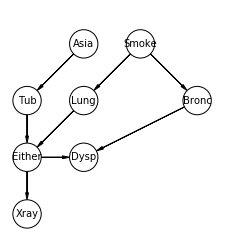

In [234]:
pgm = PGM(shape=[4, 4])
pgm.add_node(daft.Node('Asia', r"Asia", 2, 7))
pgm.add_node(daft.Node('Tub', r"Tub", 1, 6))
pgm.add_node(daft.Node('Either', r"Either", 1, 5))
pgm.add_node(daft.Node('Xray', r"Xray", 1, 4))
pgm.add_node(daft.Node('Smoke', r"Smoke", 3, 7))
pgm.add_node(daft.Node('Lung', r"Lung", 2, 6))
pgm.add_node(daft.Node('Bronc', r"Bronc", 4, 6))
pgm.add_node(daft.Node('Dysp', r"Dysp", 2, 5))

pgm.add_edge('Asia', 'Tub')
pgm.add_edge('Tub', 'Either')
pgm.add_edge('Either', 'Xray')
pgm.add_edge('Smoke', 'Lung')
pgm.add_edge('Smoke', 'Bronc')
pgm.add_edge('Bronc', 'Dysp')
pgm.add_edge('Either', 'Dysp')
pgm.add_edge('Lung', 'Either')

pgm.render()
plt.show()

model = pgmtodaft(pgm)


## Problem 1

We have got bayesian network model. Now we use the to_markov_model() function to get the moralized form of the Bayesian Network i.e Markov's Model.After that we triangulate the moralized model and followed by building the Junction Tree with variable elimination process.

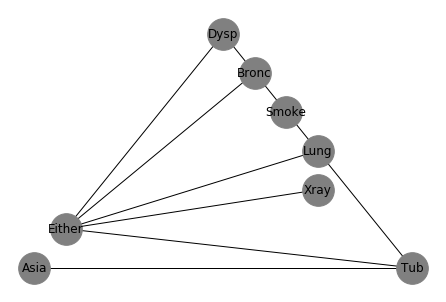

In [235]:
moral = model.to_markov_model()
nx.draw_planar(moral, with_labels=True,node_size = 1000,node_color = 'gray' )
plt.show()

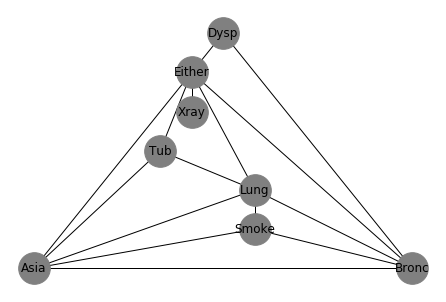

In [236]:
triangulate = moral.triangulate()
nx.draw_planar(triangulate, with_labels=True,node_size = 1000,node_color = 'gray')
plt.show()

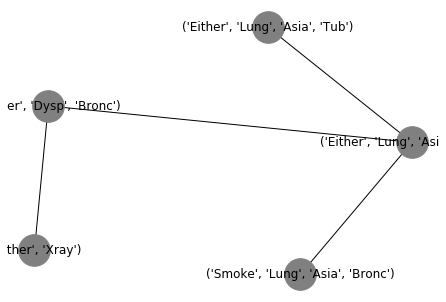

In [248]:
junctionTree = triangulate.to_junction_tree()
nx.draw(junctionTree, with_labels=True,node_size = 1000,node_color = 'gray')
plt.show()

In [238]:
cpd_A = TabularCPD(variable='Asia', variable_card=2, values=[[0.01, 0.99]])
cpd_S = TabularCPD(variable='Smoke', variable_card=2, values=[[0.5, 0.5]])
cpd_T = TabularCPD(variable='Tub', variable_card=2, 
                   values=[[0.05, 0.01],
                           [0.95,0.99]],
                  evidence=['Asia'],
                  evidence_card=[2])
cpd_L = TabularCPD(variable='Lung', variable_card=2, 
                   values=[[0.1,0.01],
                           [0.9,0.99]],
                  evidence=['Smoke'],
                  evidence_card=[2])
cpd_B = TabularCPD(variable='Bronc', variable_card=2, 
                   values=[[0.6,0.3],
                           [0.4,0.7]],
                  evidence=['Smoke'],
                  evidence_card=[2])
cpd_E = TabularCPD(variable='Either', variable_card=2, 
                   values=[[1,1,1,0],
                           [0,0,0,1]],
                  evidence=['Tub','Lung'],
                  evidence_card=[2,2])
cpd_X = TabularCPD(variable='Xray', variable_card=2, 
                   values=[[0.98,0.05],
                           [0.02,0.95]],
                  evidence=['Either'],
                  evidence_card=[2])
cpd_D = TabularCPD(variable='Dysp', variable_card=2, 
                   values=[[0.9,0.7,0.8,0.1],[0.1,0.3,0.2,0.9]],
                  evidence=['Either','Bronc'],
                  evidence_card=[2,2])

In [239]:
model.add_cpds(cpd_A, cpd_S, cpd_T, cpd_L, cpd_B,cpd_E,cpd_X,cpd_D)
model.check_model()
model.get_cpds()

[<TabularCPD representing P(Asia:2) at 0x297fb1c89a0>,
 <TabularCPD representing P(Smoke:2) at 0x297fb1c8bb0>,
 <TabularCPD representing P(Tub:2 | Asia:2) at 0x297fb1c8580>,
 <TabularCPD representing P(Lung:2 | Smoke:2) at 0x297fb1c8a30>,
 <TabularCPD representing P(Bronc:2 | Smoke:2) at 0x297fb1c84f0>,
 <TabularCPD representing P(Either:2 | Tub:2, Lung:2) at 0x297fb1c8ac0>,
 <TabularCPD representing P(Xray:2 | Either:2) at 0x297fb1c8f40>,
 <TabularCPD representing P(Dysp:2 | Either:2, Bronc:2) at 0x297fb1c8190>]

In [240]:
print('All the Independencies of the Model')
model.local_independencies(['Asia', 'Tub', 'Either', 'Xray','Bronc' ,'Smoke','Lung','Dysp'])

All the Independencies of the Model


(Asia _|_ Lung, Smoke, Bronc)
(Tub _|_ Lung, Smoke, Bronc | Asia)
(Either _|_ Asia, Smoke, Bronc | Tub, Lung)
(Xray _|_ Smoke, Asia, Lung, Tub, Dysp, Bronc | Either)
(Bronc _|_ Asia, Lung, Xray, Tub, Either | Smoke)
(Smoke _|_ Tub, Asia)
(Lung _|_ Tub, Asia, Bronc | Smoke)
(Dysp _|_ Asia, Lung, Xray, Tub, Smoke | Either, Bronc)

In [241]:
print('CPD of Asia')
print(cpd_A)
print('CPD of Smoke')
print(cpd_S)
print('CPD of Tub')
print(cpd_T)
print('CPD of Lung')
print(cpd_L)
print('CPD of Bronc')
print(cpd_B)
print('CPD of Xray')
print(cpd_X)
print('CPD of Dysp')
print(cpd_D)

CPD of Asia
+---------+------+
| Asia(0) | 0.01 |
+---------+------+
| Asia(1) | 0.99 |
+---------+------+
CPD of Smoke
+----------+-----+
| Smoke(0) | 0.5 |
+----------+-----+
| Smoke(1) | 0.5 |
+----------+-----+
CPD of Tub
+--------+---------+---------+
| Asia   | Asia(0) | Asia(1) |
+--------+---------+---------+
| Tub(0) | 0.05    | 0.01    |
+--------+---------+---------+
| Tub(1) | 0.95    | 0.99    |
+--------+---------+---------+
CPD of Lung
+---------+----------+----------+
| Smoke   | Smoke(0) | Smoke(1) |
+---------+----------+----------+
| Lung(0) | 0.1      | 0.01     |
+---------+----------+----------+
| Lung(1) | 0.9      | 0.99     |
+---------+----------+----------+
CPD of Bronc
+----------+----------+----------+
| Smoke    | Smoke(0) | Smoke(1) |
+----------+----------+----------+
| Bronc(0) | 0.6      | 0.3      |
+----------+----------+----------+
| Bronc(1) | 0.4      | 0.7      |
+----------+----------+----------+
CPD of Xray
+---------+-----------+-----------+
|

The derived Junction tree has satisfied the Running Intersection Property as it states that if a node appears in two cliques, it should also appear in all the nodes on the path that connect the two cliques.

## Problem 2

In [243]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
P_A = infer.query(['Asia'])
print('P(A) = ',P_A)
P_TA = infer.query(['Tub'],evidence={'Asia':1})
print('P(T|A) = ',P_TA)
P_S = infer.query(['Smoke'])
print('P(S) = ',P_S)
P_LS = infer.query(['Lung'],evidence={'Smoke':1})
print('P(L|S) = ',P_LS)
P_BS = infer.query(['Bronc'],evidence={'Smoke':1})
print('P(L|S) = ',P_BS)
P_E_TL = infer.query(['Either'],evidence={'Tub':1,'Lung':1})
print('P(E|T,L) = ',P_E_TL)
P_D_EB = infer.query(['Dysp'],evidence={'Either':1,'Bronc':1})
print('P(D|E,B) = ',P_D_EB)
P_XE = infer.query(['Xray'],evidence={'Either':1})
print('P(X|E) = ',P_XE)

Eliminating: Bronc: 100%|███████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 752.61it/s]

P(A) =  +---------+-------------+
| Asia    |   phi(Asia) |
+=========+=============+
| Asia(0) |      0.0100 |
+---------+-------------+
| Asia(1) |      0.9900 |
+---------+-------------+
P(T|A) =  +--------+------------+
| Tub    |   phi(Tub) |
+========+============+
| Tub(0) |     0.0100 |
+--------+------------+
| Tub(1) |     0.9900 |
+--------+------------+
P(S) =  +----------+--------------+
| Smoke    |   phi(Smoke) |
+==========+==============+
| Smoke(0) |       0.5000 |
+----------+--------------+
| Smoke(1) |       0.5000 |
+----------+--------------+
P(L|S) =  +---------+-------------+
| Lung    |   phi(Lung) |
+=========+=============+
| Lung(0) |      0.0100 |
+---------+-------------+
| Lung(1) |      0.9900 |
+---------+-------------+
P(L|S) =  +----------+--------------+
| Bronc    |   phi(Bronc) |
+==========+==============+
| Bronc(0) |       0.3000 |
+----------+--------------+
| Bronc(1) |       0.7000 |
+----------+--------------+
P(E|T,L) =  +-----------+-----

In [244]:
print('The Probability Distribution Table of P(V) is -')
P_V = P_A*P_TA*P_S*P_LS*P_BS*P_E_TL*P_D_EB*P_XE
print(P_V)

The Probability Distribution Table of P(V) is -
+---------+--------+----------+---------+----------+-----------+---------+---------+---------------------------------------------------+
| Asia    | Tub    | Smoke    | Lung    | Bronc    | Either    | Dysp    | Xray    |   phi(Asia,Tub,Smoke,Lung,Bronc,Either,Dysp,Xray) |
+=========+========+==========+=========+==========+===========+=========+=========+===================================================+
| Asia(0) | Tub(0) | Smoke(0) | Lung(0) | Bronc(0) | Either(0) | Dysp(0) | Xray(0) |                                            0.0000 |
+---------+--------+----------+---------+----------+-----------+---------+---------+---------------------------------------------------+
| Asia(0) | Tub(0) | Smoke(0) | Lung(0) | Bronc(0) | Either(0) | Dysp(0) | Xray(1) |                                            0.0000 |
+---------+--------+----------+---------+----------+-----------+---------+---------+----------------------------------------------